# Segundo Examen Parcial
### Estimación Óptima 

### Estudiantes:
- Clara Paola Aguilar Casillas

- Samantha Sánchez Tinoco

- Priscila Cervantes Ramírez

- Rafael Takata García

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

Importamos los datos e información básica sobre estos:

In [102]:
df = pd.read_csv('data/datos_gente.csv')
df.head()

,altura,ancho,pie
0,185,55,28.0
1,173,44,26.5
2,163,44,24.0
3,162,44,24.5
4,172,46,27.0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   altura  18 non-null     int64  
 1   ancho   18 non-null     int64  
 2   pie     18 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 564.0 bytes


In [104]:
df.describe()

,altura,ancho,pie
count,18.000000,18.000000,18.000000
mean,167.111111,45.222222,25.277778
std,10.208929,6.664706,2.170811
min,150.000000,38.000000,22.000000
25%,159.750000,40.000000,24.000000
50%,165.500000,44.000000,24.500000
75%,172.750000,48.750000,27.375000
max,187.000000,61.000000,29.000000


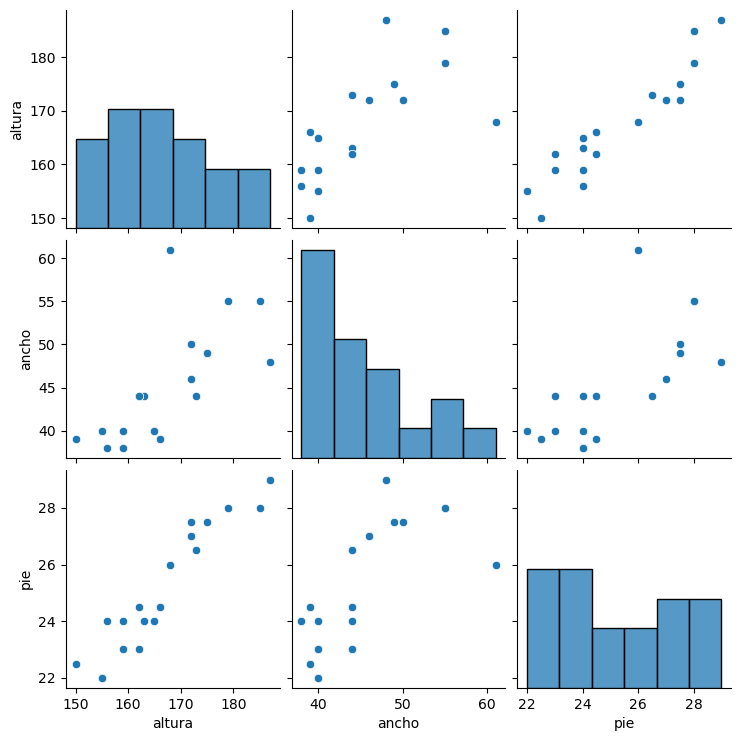

In [105]:
sns.pairplot(df)

<Axes: >

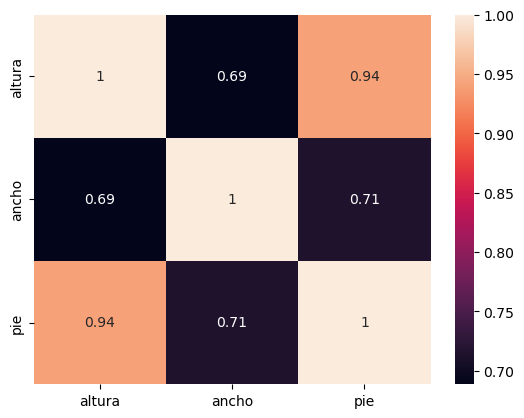

In [106]:
sns.heatmap(df.corr(), annot=True)

Después de un muy básico analisis inicial podemos ver que:

- Tenemos 18 entradas
- No hay datos faltantes
- Dos variables son de tipo `Int` y una `Float`
- Son relaciones lineales, altamente correlacionadas


---

Ahora empezaremos con la separación de los datos para nuestro modelo.

In [107]:
X = df[['ancho', 'pie']]
y = df['altura']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

En este caso, nosotros hemos propuesto tres modelos iniciales.

- Una Regresión lineal sin regularización

- Ridge

- Lasso

In [108]:
#Regresión lineal
#Entrenamiento
lr = LinearRegression()
lr.fit(X_train, y_train)

#Predicción
y_test_pred = lr.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {lr.coef_[0]}")
print(f"Intercepción: {lr.intercept_}")

Error cuadrático medio en prueba: 11.6061
R² en prueba: 0.8425
Pendiente: -0.0031472081218277977
Intercepción: 54.28434702353481


In [109]:
#Ridge
#Entrenamiento
ridge = Ridge()
ridge.fit(X_train, y_train)

#Predicción
y_test_pred = ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {ridge.coef_[0]}")
print(f"Intercepción: {ridge.intercept_}")

Error cuadrático medio en prueba: 11.3509
R² en prueba: 0.8459
Pendiente: 0.024043647645113467
Intercepción: 56.545484126913365


In [110]:
#Lasso
#Entrenamiento
lasso = Lasso()
lasso.fit(X_train, y_train)

#Predicción
y_test_pred = lasso.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {lasso.coef_[0]}")
print(f"Intercepción: {lasso.intercept_}")

Error cuadrático medio en prueba: 11.3108
R² en prueba: 0.8465
Pendiente: 0.03718503995685833
Intercepción: 60.24261755999828


Obtuvimos resultados muy similares en primera instancia, veamos si a través del tuneo de híperparametros obtenemos mejores resultados:

---
Ridge

In [111]:
#Definimos el espacio de busqueda
alphas = np.logspace(0, 10, 100)

#Parametros y busqueda
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

#Mejor alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha}")

Mejor alpha encontrado: 1.5922827933410924


Veamos los resultados con el alpha optimizado a través del grid search:

In [112]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

#Predicción
y_test_pred = ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {ridge.coef_[0]}")
print(f"Intercepción: {ridge.intercept_}")

Error cuadrático medio en prueba: 11.2384
R² en prueba: 0.8474
Pendiente: 0.03929014437173918
Intercepción: 57.818821907544816


Los resultados no cambian mucho pero, si obtenemos mejores resultados en la prueba y el testing.

Lasso

In [113]:
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

#Mejor alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha}")

Mejor alpha encontrado: 1.5922827933410924


In [114]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

#Predicción
y_test_pred = lasso.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {lasso.coef_[0]}")
print(f"Intercepción: {lasso.intercept_}")

Error cuadrático medio en prueba: 11.3785
R² en prueba: 0.8455
Pendiente: 0.06099087779669846
Intercepción: 63.7708782039431


### Evaluación

Después del fine-tuning, podemos observar que el modelo que nos da mejores resultados en la prueba es `Ridge` después de que realizaramos la optimización.

1. Realiza la gráfica de tu modelo con un scatterplot de los datos incluyendo el valor de R2 y RMSE.

a. ¿Por qué seleccionaste ese modelo?

Como se mencionó anteriormente se seleccionó el modelo de **Ridge** ya que fue el que nos dio mejores resultados, y se seleccionó un modelo múltiple ya que estaremos trabajando con las dos variables independientes ('ancho','pie') para obtener mejores resultados de la dependiente ('altura') o a predecir.

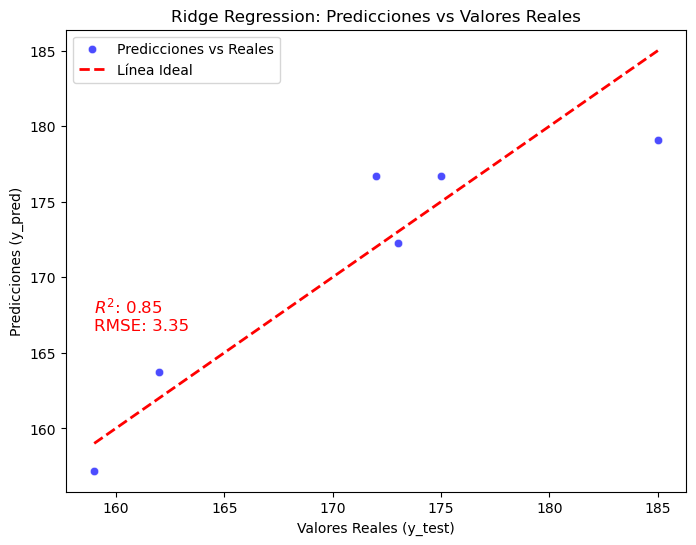

In [115]:
# Predicciones del modelo
y_pred = ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, label="Predicciones vs Reales", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Línea Ideal")

# Agregar valores de R² y RMSE a la gráfica
plt.text(y_test.min(), y_test.max() * 0.9, f"$R^2$: {r2:.2f}\nRMSE: {rmse:.2f}", fontsize=12, color="red")

# Etiquetas y título
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Ridge Regression: Predicciones vs Valores Reales")
plt.legend()
plt.show()

Podemos observar que el modelo explica en un 85% de la variabilidad de los datos de prueba, eso nos quiere decir que no está tan mal pero podría mejorar.

Por otro lado las predicciones del modelo están a 3.35 valores, esto nos indica que tenemos varios outliers altos que nos está afectando nuestro modelo. 


b. ¿Utilizaste alguna regularización?

El algoritmo propuesto usa una regularización L2 o de Ridge, en este caso, con un alpha de: $1.5922827933410924$ Con esto, podemos evitar el sobreajuste y mejorar la calidad de nuestras predicciones.

2. Se te solicita que tu modelo sea tropicalizado a la población de estudiantes del iteso. Realiza la gráfica de tu propuesta con un scatterplot de los datos incluyendo el valor de R2 y RMSE.

a. ¿Agregarías datos a tu base de datos para mejorar las predicciones del modelo?

Sí, como nuestra base de datos inicial es pequeña, el rendimiento del modelo no es lo suficientemente bueno.

Es por esto que, se agregaron más datos a nuestra base ya que, con los anteriores no eran  suficientes para poder realizar predicciones de la mejor manera y se concentraba en el promedio de la mayoría de las personas que tomamos las medidas principales (el promedio de la muestra). Esto hacía que con los valores atípicos las predicciones no se le acercaban en los valores reales en lo más mínimo. Al agregar más datos se amplía el panorama para poder mejorar el modelo. 

In [116]:
#Solo tenemos 18 muestras
df.shape

(18, 3)

b. ¿Cómo conseguirías dicha información?

La información se podría obtener a través de las mediciones de los alumnos del iteso, no necesariamente que conozcamos, sino recaudar más infromación posible, acercándonos a preguntarles. 

Otra manera sería la creación de datos sínteticos que asemejen a los outliers o aquellos datos que tenemos pocos.

En esta práctica, hemos tomado más muestras de alumnos obteniendo el siguiente resultado:

In [117]:
df_amp = pd.read_csv('data/datos_gente_nuevo.csv')
df_amp.shape

(99, 3)

Es un dataframe con 99 muestras, lo que amplia mucho más el panorama y nuestra información para el modelo.

c. ¿Modificarías algún parámetro de tu modelo?

Sí, al añadir datos a nuestro modelo y mantener el alpha actual, al momento de hacer el entrenamiento y debido a la cantidad nueva de datos disponibles, podríamos caer nuevamente en un sobreajuste y sería necesario el buscar otro alpha que evite el overfitting.

Nuestros datos nuevos (obtenidos a través de medición empirica de los estudiantes) se ve así:

<Axes: >

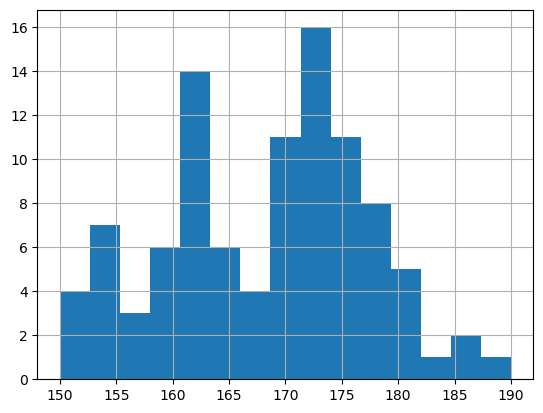

In [118]:
df_amp['altura'].hist(bins=15)

Podemos apreciar que, a pesar de las nuevas muestras, seguimos teniendo muy poca información de las personas que miden más de 175 y menos de 160. Podemos crear modelos enfocados solo a estas alturas y crear copias sínteticas para su entrenamiento.

Esto mejoraría la calidad de nuestras predicciones en estos rangos de altura.

### Creación de los modelos enfocados a outliers:

In [119]:
df_menor = df_amp[df_amp['altura'] < 160]
df_mayor = df_amp[df_amp['altura'] > 175]

df_menor.shape, df_mayor.shape

((17, 3), (19, 3))

A pesar de representar rangos de altura de 10 cm o más, solo tienen una concentración del 20% o menos de nuestros datos en cada una.

Ahora creamos los datos sínteticos:

#### Menor

In [120]:
df_menor.mean(), df_menor.std()

(altura    154.588235
 ancho      40.058824
 pie        23.117647
 dtype: float64,
 altura    2.895229
 ancho     3.051036
 pie       0.820240
 dtype: float64)

Ahora solo nos apoyamos de herramientas como numpy para la creación síntetica de los datos:

In [121]:
altura_m = np.sort(np.round(np.random.normal(loc=154.58823529411765, scale=2.895229341723462, size=100), 0))
ancho_m = np.sort(np.round(np.random.normal(loc=40.058824, scale=3.051036, size=100), 0))
pie_m = np.sort(np.round(np.random.normal(loc=23.117647, scale=0.820240, size=100), 1))
df_menor_sintetico = pd.DataFrame({'altura': altura_m, 'ancho': ancho_m, 'pie': pie_m})
df_menor_sintetico.head()

,altura,ancho,pie
0,145.0,32.0,20.3
1,148.0,34.0,20.8
2,148.0,35.0,21.2
3,148.0,35.0,21.6
4,150.0,35.0,21.7


### Mayor

In [122]:
df_mayor.mean(), df_mayor.std()

(altura    180.105263
 ancho      49.263158
 pie        27.657895
 dtype: float64,
 altura    3.695263
 ancho     4.805577
 pie       1.014515
 dtype: float64)

In [123]:
altura_M = np.sort(np.round(np.random.normal(loc=180.105263, scale=3.695263, size=100), 0))
ancho_M = np.sort(np.round(np.random.normal(loc=49.263158, scale=4.805577, size=100), 0))
pie_M = np.sort(np.round(np.random.normal(loc=27.657895, scale=1.014515, size=100), 1))
df_mayor_sintetico = pd.DataFrame({'altura': altura_M, 'ancho': ancho_M, 'pie': pie_M})
df_mayor_sintetico.head()

,altura,ancho,pie
0,172.0,40.0,25.4
1,173.0,40.0,25.5
2,175.0,41.0,25.5
3,175.0,41.0,25.6
4,175.0,43.0,25.7


### Dataframe junto

Gracias a las nuevas muestras, tanto reales como sínteticas, podemos obtener este dataframe nuevo:

In [124]:
df_amp_sint = pd.concat([df_amp, df_menor_sintetico, df_mayor_sintetico], ignore_index=True)
df_amp_sint.shape

(299, 3)

Ahora tenemos un dataframe con casí 300 muestras y que, su distribución de alturas se ve así:

In [125]:
df_amp_sint.isna().sum()

altura    0
ancho     0
pie       0
dtype: int64

<Axes: >

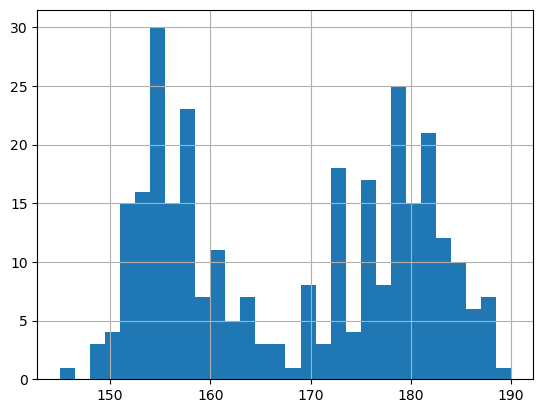

In [126]:
df_amp_sint['altura'].hist(bins=30)

Esta distribución ya representa más información en los datos donde no teniamos información. Además, tenemos los datos separados en menores y mayores donde nuestra primera muestra de la población carecía de entradas por lo que, ahora podemos entrenar modelos especificos para estos rangos o mejorar la calidad de un algoritmo general.

Veamos como funciona nuestro modelo tomando estos datos, representando de mejor forma la población general del ITESO:

Primero separamos en entrenamiento y prueba:

In [ ]:
X = df_amp_sint[['ancho','pie']]
y = df_amp_sint['altura']
X_train_iteso, X_test_iteso, y_train_iteso, y_test_iteso = train_test_split(X, y, test_size = 0.2, random_state = 42)

Entrenamos y buscamos el mejor alpha:

In [128]:
ridge_iteso = Ridge()
grid_search = GridSearchCV(ridge_iteso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_iteso, y_train_iteso)
best_alpha_iteso = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha_iteso}")

Mejor alpha encontrado: 1.0


In [ ]:
ridge_iteso = Ridge(best_alpha_iteso)
ridge_iteso.fit(X_train_iteso, y_train_iteso)
y_pred_iteso = ridge_iteso.predict(X_test_iteso)
r2 = r2_score(y_test_iteso, y_pred_iteso)
rmse = np.sqrt(mean_squared_error(y_test_iteso, y_pred_iteso))
print("R2", r2, 'RMSE', rmse)

R2 0.9081257654024724 MSE 12.48101268759124


Obtenemos buenos resultados en el R2 que no muestrns un sobreajuste claro, sin embargo, el RMSE es bastante alto. Veamos como se ve la gráfica de los resultados:

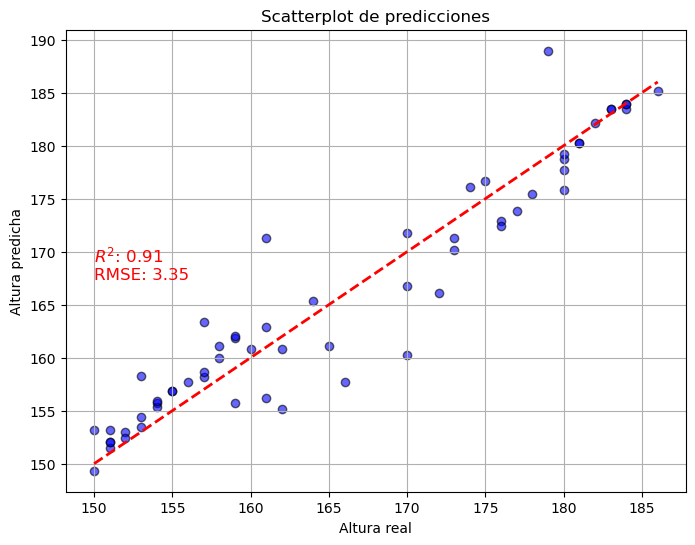

In [131]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test_iteso, y=y_pred_iteso, alpha=0.6, edgecolors='k',label="Predicciones vs Reales", color="blue")
plt.plot([y_test_iteso.min(), y_test_iteso.max()], [y_test_iteso.min(), y_test_iteso.max()], 'r--', lw=2,label="Línea Ideal")  # Línea de referencia
plt.xlabel("Altura real")
plt.ylabel("Altura predicha")
plt.title(f"Scatterplot de predicciones")
plt.text(y_test_iteso.min(), y_test_iteso.max() * 0.9, f"$R^2$: {r2:.2f}\nRMSE: {rmse:.2f}", fontsize=12, color="red")
plt.grid(True)
plt.show()

La mayoría de los errores se encuentran en donde era la media de nuestros valores reales, por lo que tal vez sea recomendable separar en 3 modelos de predicción. Los sínteticos menores, los normales y los mayores.

### Creación de los 3 modelos separados:

Modelo de los menores:

In [132]:
X = df_menor_sintetico[['ancho','pie']]
y = df_menor_sintetico['altura']
X_train_menor, X_test_menor, y_train_menor, y_test_menor = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [133]:
ridge_menor = Ridge()
grid_search = GridSearchCV(ridge_menor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_menor, y_train_menor)
best_alpha_menor = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha_menor}")

Mejor alpha encontrado: 1.0


In [134]:
ridge_menor = Ridge(best_alpha_menor)
ridge_menor.fit(X_train_menor, y_train_menor)
y_pred_menor = ridge_menor.predict(X_test_menor)
r2 = r2_score(y_test_menor, y_pred_menor)
rmse = np.sqrt(mean_squared_error(y_test_menor, y_pred_menor))
print("R2", r2, 'RMSE', rmse)

R2 0.9762807578262751 RMSE 0.4719361016189334


Estos resultados muestran un claro sobreajuste, podemos mover las alphas para evitar el overfitting.

In [ ]:
alphas_test = np.linspace(1, 200, 10)
for alpha in alphas_test:
    ridge_menor = Ridge(alpha=alpha)
    ridge_menor.fit(X_train_menor, y_train_menor)
    y_pred_menor = ridge_menor.predict(X_test_menor)
    r2_menor = r2_score(y_test_menor, y_pred_menor)
    rmse_menor = np.sqrt(mean_squared_error(y_test_menor, y_pred_menor))
    print("alpha", alpha, "R2", r2_menor, 'RMSE', rmse_menor)

alpha 1.0 R2 0.9762807578262751 RMSE 0.4719361016189334
alpha 23.11111111111111 R2 0.9409212783450528 RMSE 0.7448148738713227
alpha 45.22222222222222 R2 0.9323139790449433 RMSE 0.7972275313660353
alpha 67.33333333333333 R2 0.9249012201968094 RMSE 0.8397484994639521
alpha 89.44444444444444 R2 0.9174017532481421 RMSE 0.8806801559022126
alpha 111.55555555555556 R2 0.9096044114543396 RMSE 0.921311335241107
alpha 133.66666666666666 R2 0.9014919674279613 RMSE 0.961764225707862
alpha 155.77777777777777 R2 0.8930970868253958 RMSE 1.001907358346835
alpha 177.88888888888889 R2 0.8844652212893767 RMSE 1.0415716836073996
alpha 200.0 R2 0.8756428055084832 RMSE 1.0806081881400598


Modelo de la media 'real':

In [ ]:
X = df_amp[['ancho','pie']]
y = df_amp['altura']
X_train_amp, X_test_amp, y_train_amp, y_test_amp = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
ridge_menor = Ridge()
grid_search = GridSearchCV(ridge_menor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_menor, y_train_menor)
best_alpha_menor = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha_menor}")

Modelo de los mayores: